In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Configurar pandas para mostrar todas las columnas sin saltos de línea
pd.set_option('display.expand_frame_repr', False)  # Evita el salto de línea
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 200)  # Ajusta el ancho máximo para evitar cortes

In [13]:
# Cargar datos (reemplazar con tu archivo real)
df = pd.read_excel("Online Retail.xlsx", engine="openpyxl")  

In [24]:
# Mostrar las primeras filas del dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  


In [44]:
# Ver información general sobre el dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   Month        397884 non-null  int32         
 9   TotalPrice   397884 non-null  float64       
 10  IsReturn     397884 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 32.3+ MB
None


In [45]:
# Ver las estadísticas básicas
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice     CustomerID          Month     TotalPrice
count  397884.000000                         397884  397884.000000  397884.000000  397884.000000  397884.000000
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   15294.423453       7.612475      22.397000
min         1.000000            2010-12-01 08:26:00       0.001000   12346.000000       1.000000       0.001000
25%         2.000000            2011-04-07 11:12:00       1.250000   13969.000000       5.000000       4.680000
50%         6.000000            2011-07-31 14:39:00       1.950000   15159.000000       8.000000      11.800000
75%        12.000000            2011-10-20 14:33:00       3.750000   16795.000000      11.000000      19.800000
max     80995.000000            2011-12-09 12:50:00    8142.750000   18287.000000      12.000000  168469.600000
std       179.331775                            NaN      22.097877    1713.141560       3.416520     309

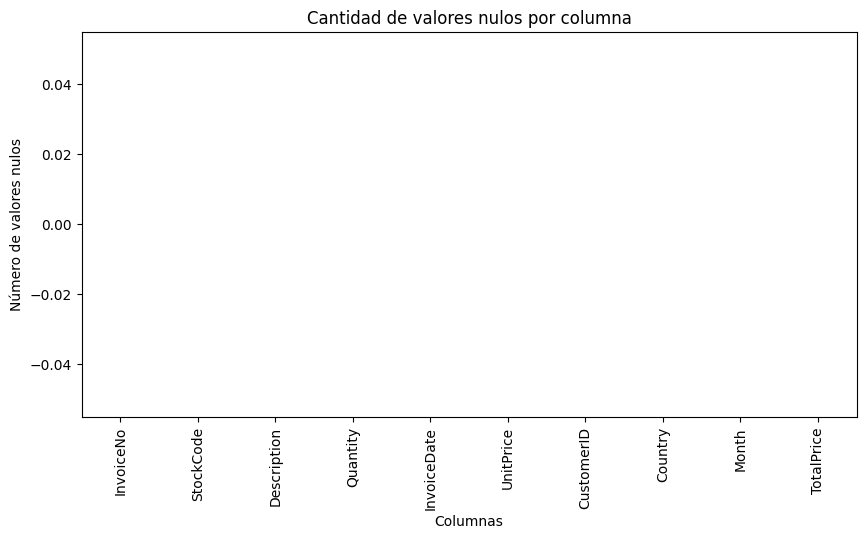

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular valores nulos por columna
missing_values = df.isnull().sum()

# Graficar valores nulos (incluye las columnas con 0 nulos)
plt.figure(figsize=(10, 5))
missing_values.plot(kind="bar", color="red")
plt.title("Cantidad de valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Número de valores nulos")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.show()




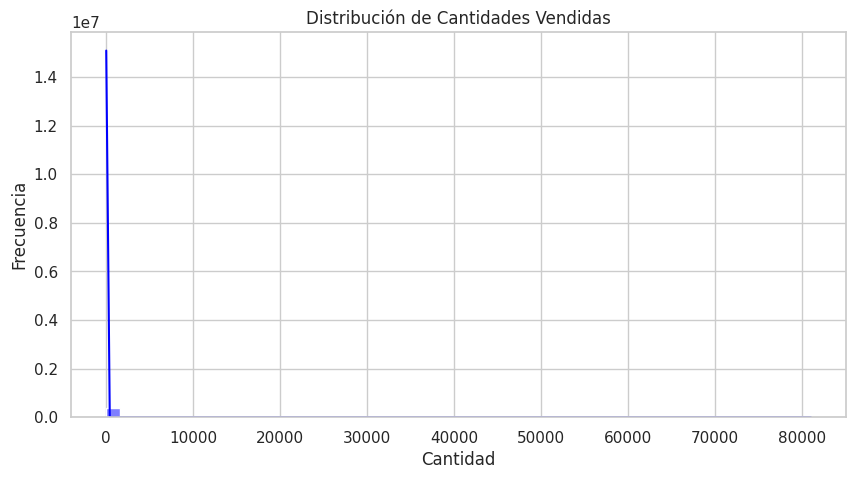

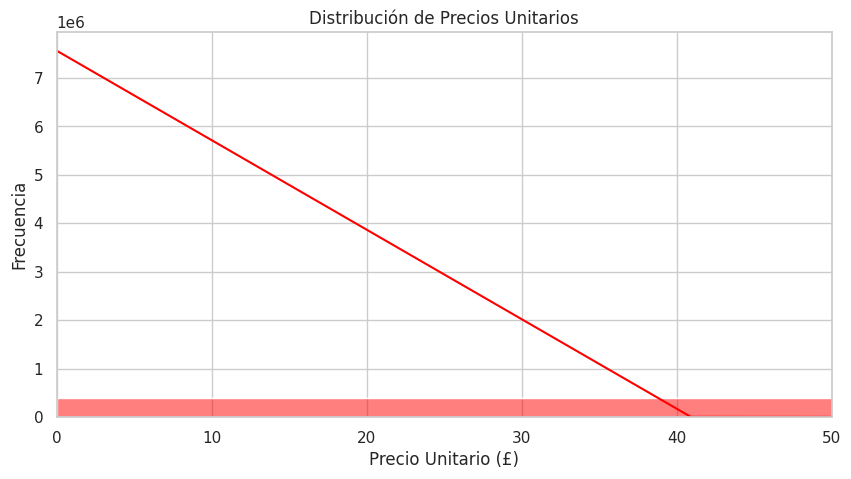

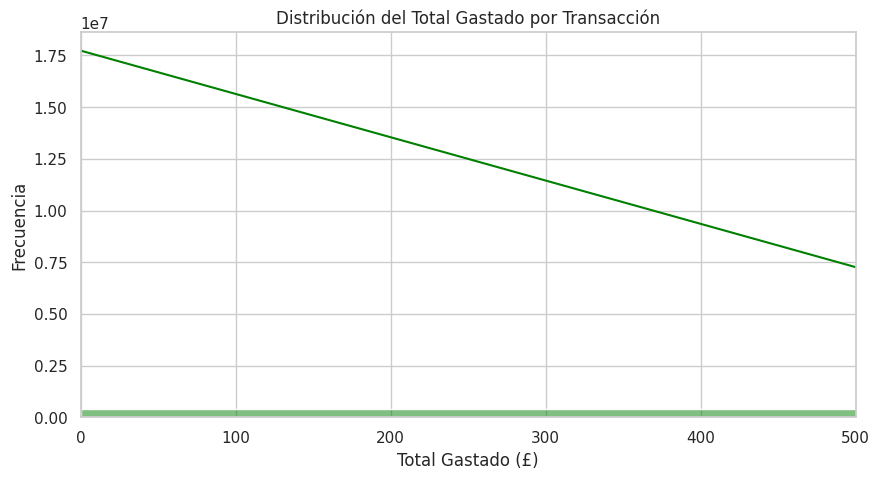

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que TotalPrice está calculado
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Configuración de estilo
sns.set(style="whitegrid")

# **1️⃣ Histograma de Cantidad Vendida**
plt.figure(figsize=(10, 5))
sns.histplot(df["Quantity"], bins=50, kde=True, color="blue")
plt.title("Distribución de Cantidades Vendidas")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

# **2️⃣ Histograma de Precios Unitarios**
plt.figure(figsize=(10, 5))
sns.histplot(df["UnitPrice"], bins=50, kde=True, color="red")
plt.title("Distribución de Precios Unitarios")
plt.xlabel("Precio Unitario (£)")
plt.ylabel("Frecuencia")
plt.xlim(0, 50)  # Para evitar valores atípicos extremos
plt.show()

# **3️⃣ Histograma del Total Gastado por Compra**
plt.figure(figsize=(10, 5))
sns.histplot(df["TotalPrice"], bins=50, kde=True, color="green")
plt.title("Distribución del Total Gastado por Transacción")
plt.xlabel("Total Gastado (£)")
plt.ylabel("Frecuencia")
plt.xlim(0, 500)  # Para centrarnos en compras típicas
plt.show()


In [27]:
# Ver cuántos valores nulos hay por columna
print(df.isnull().sum())

# Opciones para manejar valores nulos:
# 1. Eliminar filas donde CustomerID sea nulo (opcional si necesitas análisis de clientes)
df = df.dropna(subset=["CustomerID"])

# 2. Rellenar valores nulos si es necesario
df["Description"] = df["Description"].fillna("Unknown")


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Month               0
dtype: int64


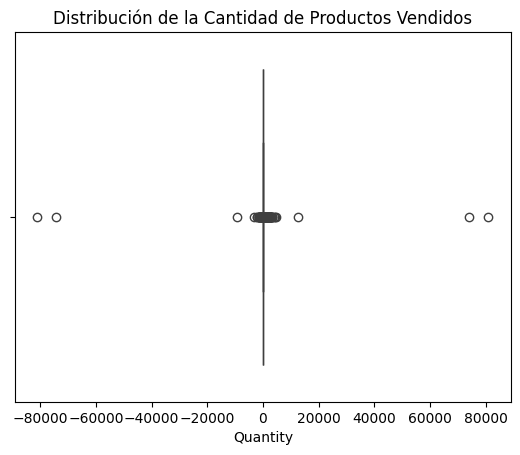

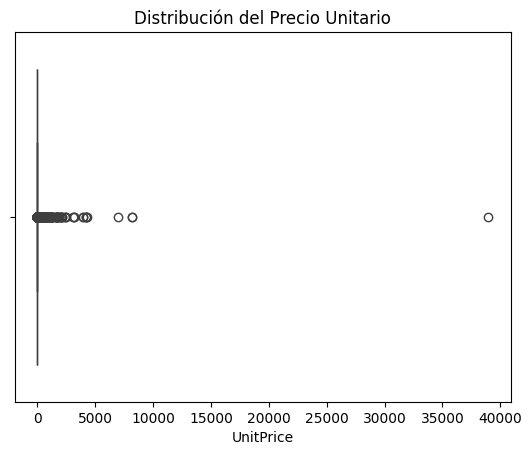

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la cantidad de productos vendidos
sns.boxplot(x=df["Quantity"])
plt.title("Distribución de la Cantidad de Productos Vendidos")
plt.show()

# Distribución del precio unitario
sns.boxplot(x=df["UnitPrice"])
plt.title("Distribución del Precio Unitario")
plt.show()

# Opcional: Filtrar valores extremos
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]


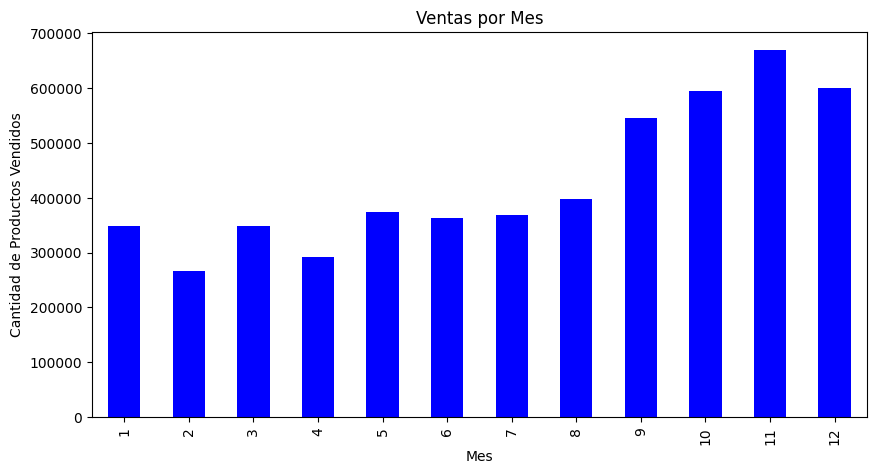

In [29]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.month

# Ventas por mes
monthly_sales = df.groupby("Month")["Quantity"].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="bar", color="blue")
plt.title("Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Productos Vendidos")
plt.show()


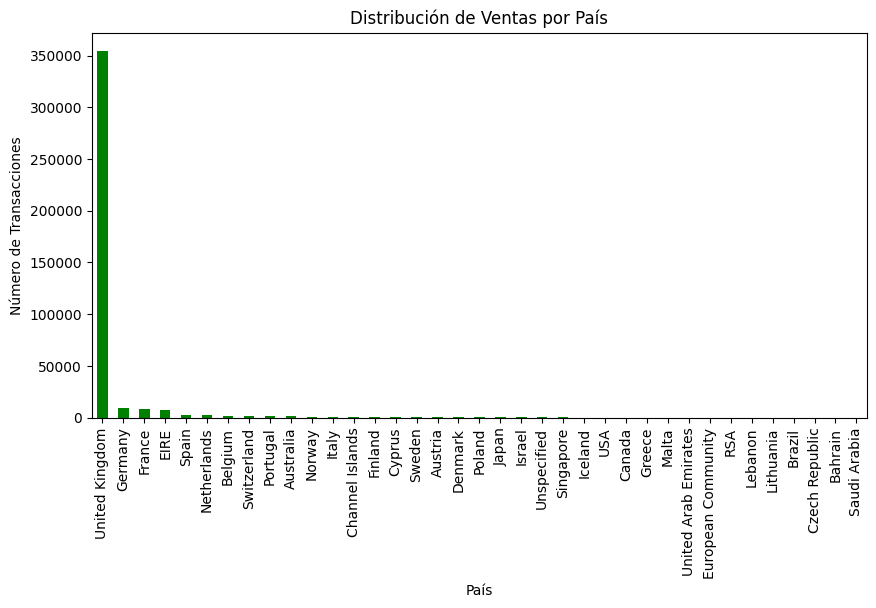

In [30]:
country_sales = df["Country"].value_counts()

plt.figure(figsize=(10, 5))
country_sales.plot(kind="bar", color="green")
plt.title("Distribución de Ventas por País")
plt.xlabel("País")
plt.ylabel("Número de Transacciones")
plt.show()


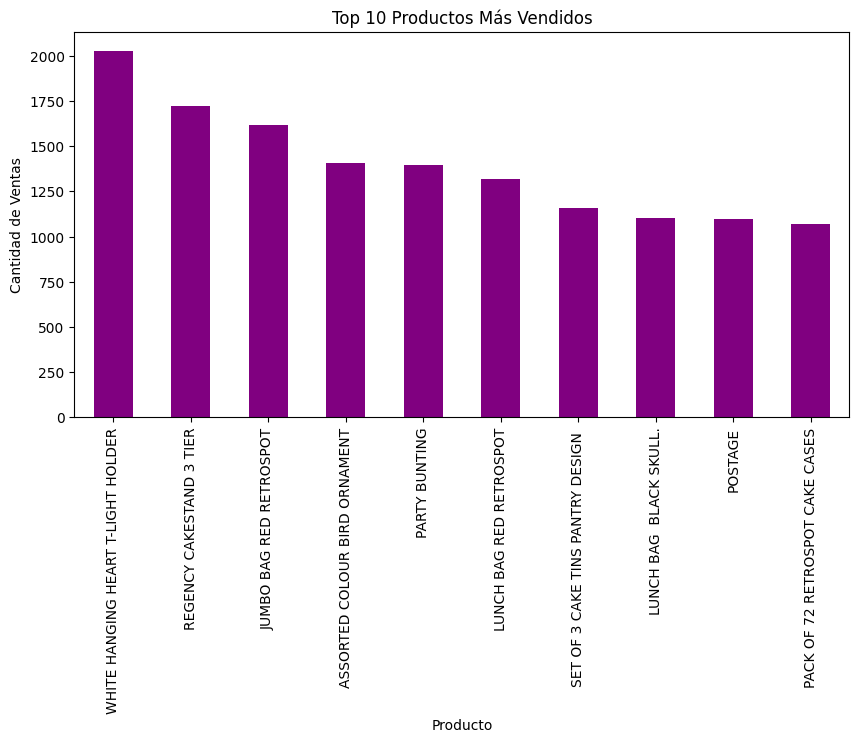

In [31]:
top_products = df["Description"].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="purple")
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad de Ventas")
plt.show()


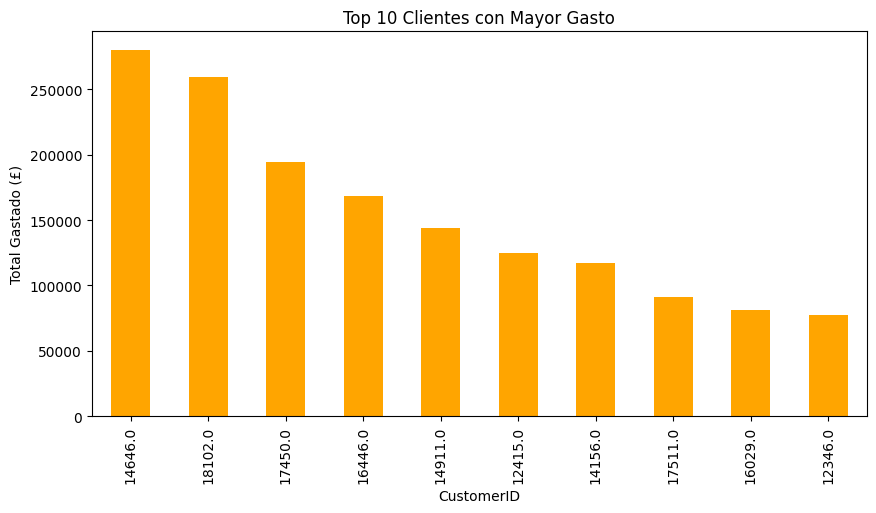

In [32]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_customers.plot(kind="bar", color="orange")
plt.title("Top 10 Clientes con Mayor Gasto")
plt.xlabel("CustomerID")
plt.ylabel("Total Gastado (£)")
plt.show()


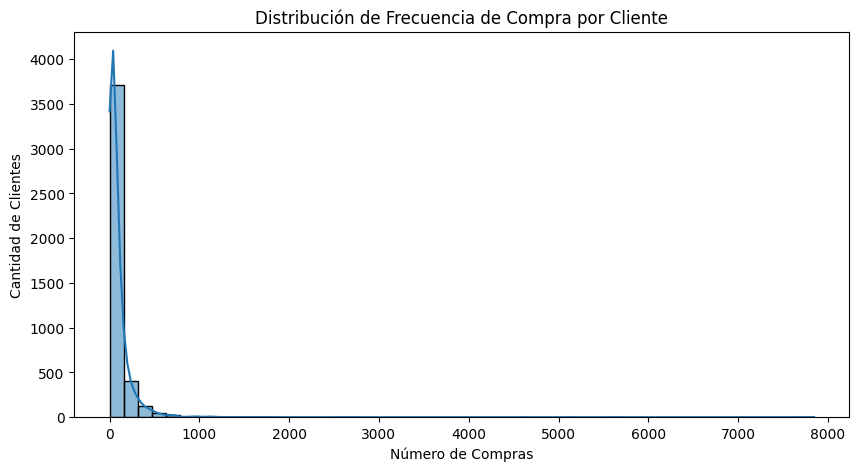

In [33]:
customer_frequency = df["CustomerID"].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(customer_frequency, bins=50, kde=True)
plt.title("Distribución de Frecuencia de Compra por Cliente")
plt.xlabel("Número de Compras")
plt.ylabel("Cantidad de Clientes")
plt.show()


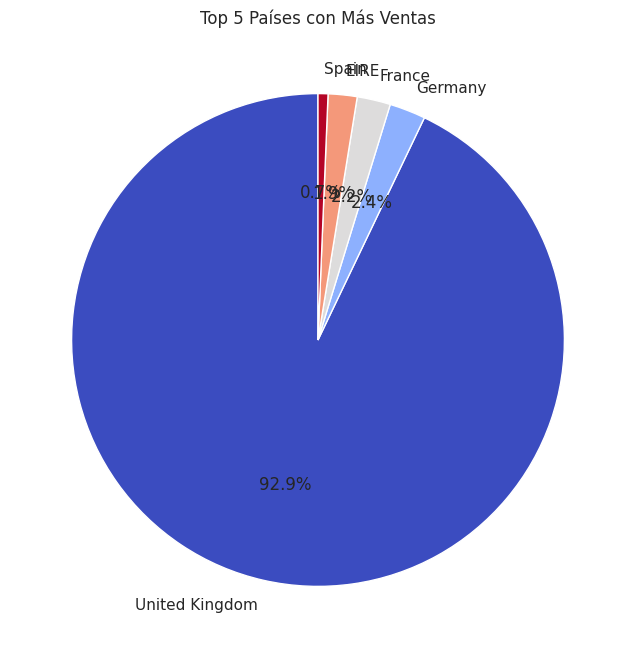

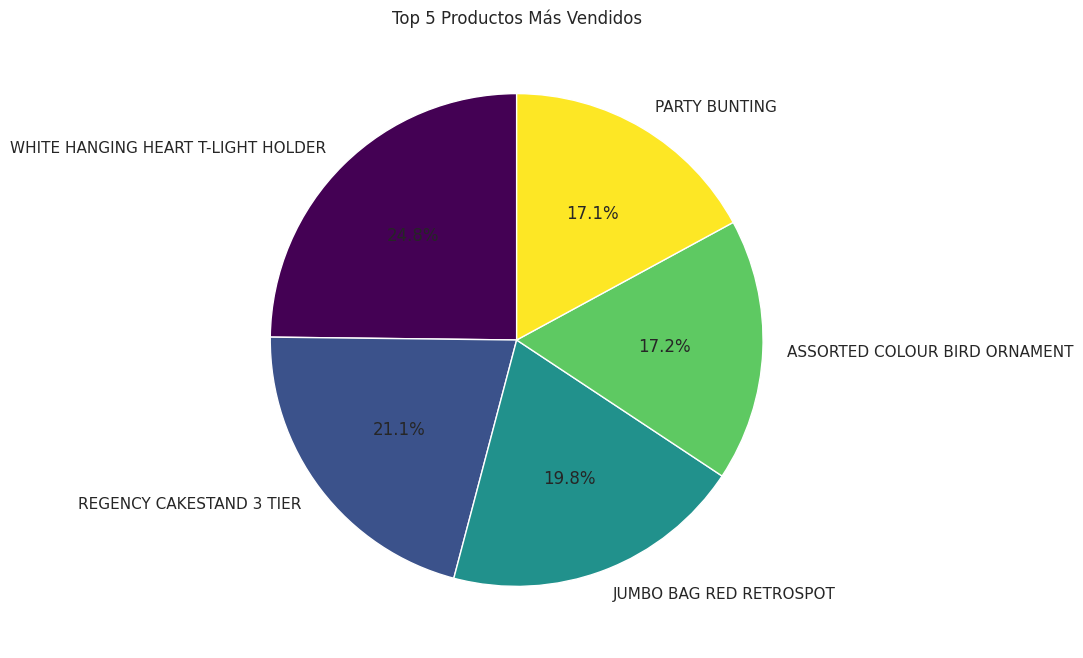

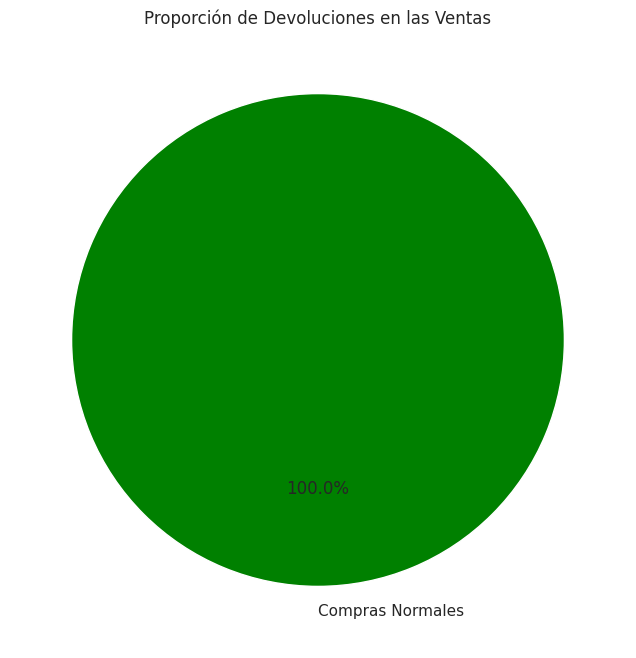

In [42]:
# **1️⃣ Gráfico de Pie: Ventas por País**
plt.figure(figsize=(8, 8))
df["Country"].value_counts().head(5).plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Top 5 Países con Más Ventas")
plt.ylabel("")
plt.show()

# **2️⃣ Gráfico de Pie: Top 5 Productos Más Vendidos**
plt.figure(figsize=(8, 8))
df["Description"].value_counts().head(5).plot(kind="pie", autopct="%1.1f%%", cmap="viridis", startangle=90)
plt.title("Top 5 Productos Más Vendidos")
plt.ylabel("")
plt.show()

# **3️⃣ Gráfico de Pie: Proporción de Transacciones con Devoluciones**
df["IsReturn"] = df["Quantity"] < 0  # Crear una columna para marcar devoluciones

plt.figure(figsize=(8, 8))
df["IsReturn"].value_counts().plot(kind="pie", labels=["Compras Normales", "Devoluciones"], autopct="%1.1f%%", colors=["green", "red"], startangle=90)
plt.title("Proporción de Devoluciones en las Ventas")
plt.ylabel("")
plt.show()


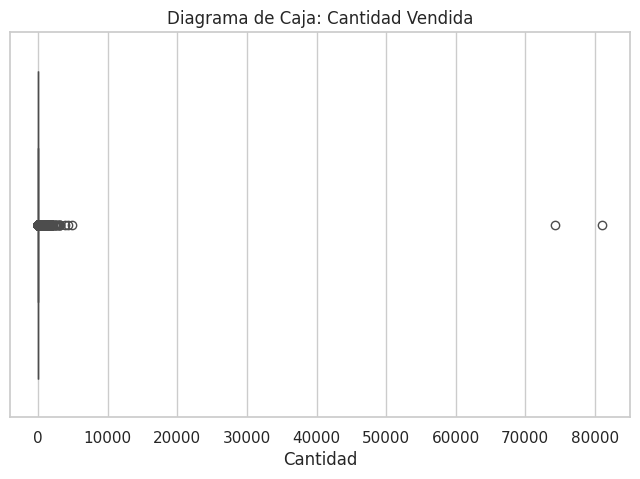

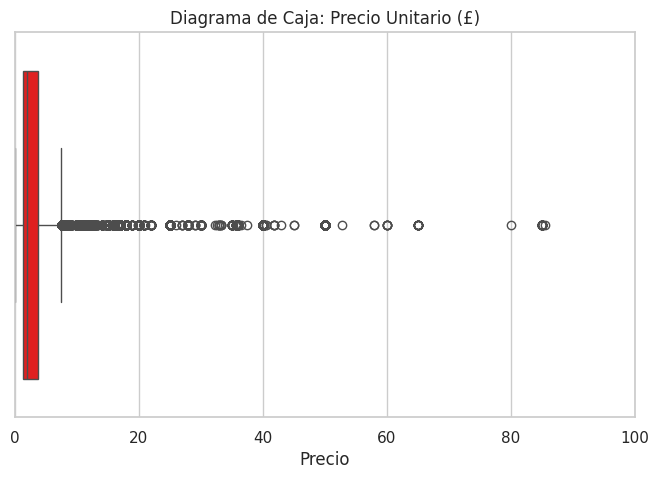

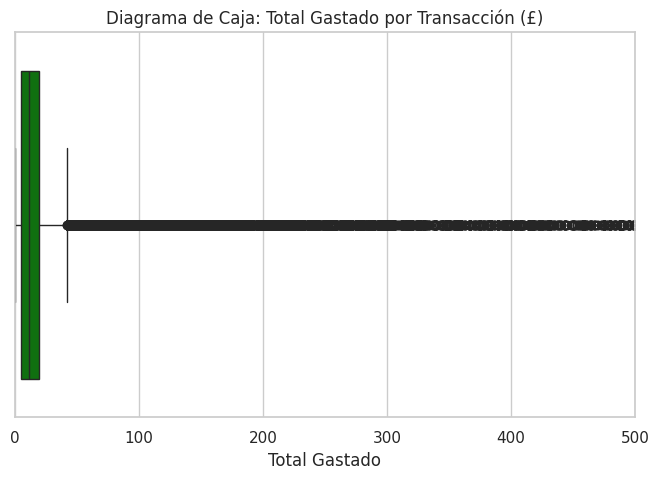

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# **1️⃣ Diagrama de Caja: Cantidad de Productos Vendidos**
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Quantity"], color="blue")
plt.title("Diagrama de Caja: Cantidad Vendida")
plt.xlabel("Cantidad")
plt.show()

# **2️⃣ Diagrama de Caja: Precio Unitario**
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["UnitPrice"], color="red")
plt.title("Diagrama de Caja: Precio Unitario (£)")
plt.xlabel("Precio")
plt.xlim(0, 100)  # Limitar para evitar valores extremos
plt.show()

# **3️⃣ Diagrama de Caja: Total Gastado por Compra**
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]  # Asegurar que TotalPrice está calculado

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["TotalPrice"], color="green")
plt.title("Diagrama de Caja: Total Gastado por Transacción (£)")
plt.xlabel("Total Gastado")
plt.xlim(0, 500)  # Limitar para ver compras comunes
plt.show()
